#  Corona vaccine progress 

version 1.0 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out
* discussion about 
     
### To do
* [Issue 11](https://github.com/salgo60/CoronaVaccinationCheck/issues/11)  redo and split number vaccinations / number people vaccinated

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-04-07 04:44:31.597899


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,Oxford/AstraZeneca,2021-03-16,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Albania,ALB,"Pfizer/BioNTech, Sinovac",2021-04-05,Ministry of Health,https://twitter.com/gmanastirliu/status/137915...
2,Algeria,DZA,Sputnik V,2021-02-19,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
3,Andorra,AND,Pfizer/BioNTech,2021-04-04,Government of Andorra,https://twitter.com/GovernAndorra/status/13787...
4,Angola,AGO,Oxford/AstraZeneca,2021-03-29,Ministry of Health,https://www.angop.ao/en/noticias/saude/covid-1...
...,...,...,...,...,...,...
161,Uruguay,URY,"Pfizer/BioNTech, Sinovac",2021-04-05,Ministry of Health,https://monitor.uruguaysevacuna.gub.uy/
162,Venezuela,VEN,Sputnik V,2021-04-02,Government of Venezuela,https://www.rfi.fr/es/am%C3%A9ricas/20210402-l...
163,Vietnam,VNM,Oxford/AstraZeneca,2021-04-03,Government of Vietnam,https://vnexpress.net/ba-nguoi-dan-ong-nhap-ca...
164,Wales,OWID_WLS,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-04,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Albania,ALB,"Pfizer/BioNTech, Sinovac",2021-04-05,Ministry of Health,https://twitter.com/gmanastirliu/status/137915...
1,Chile,CHL,"Pfizer/BioNTech, Sinovac",2021-04-05,Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/
2,Italy,ITA,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-05,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...
3,Israel,ISR,"Moderna, Pfizer/BioNTech",2021-04-05,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
4,Serbia,SRB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-04-05,Government of Serbia,https://www.rts.rs/page/stories/sr/%D0%9A%D0%B...
...,...,...,...,...,...,...
161,Greenland,GRL,Pfizer/BioNTech,2021-03-01,Government of Greenland,https://knr.gl/da/nyheder/overblik-s%C3%A5-lan...
162,Trinidad and Tobago,TTO,Oxford/AstraZeneca,2021-02-27,Ministry of Health,https://www.looptt.com/content/100800-vaccines...
163,Algeria,DZA,Sputnik V,2021-02-19,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
164,Mauritius,MUS,Oxford/AstraZeneca,2021-02-17,National Communication Committee on COVID-19,https://defimedia.info/voyages-et-covid-19-les...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
5478,Thailand,2021-04-05,"Oxford/AstraZeneca, Sinovac",https://ddc.moph.go.th/uploads/ckeditor2//file...,294881.0,247850.0,47031.0,THA,"Oxford/AstraZeneca, Sinovac",2021-04-05,Government of Thailand,https://ddc.moph.go.th/uploads/ckeditor2//file...,both
5639,Ukraine,2021-04-05,Oxford/AstraZeneca,https://vaccination.covid19.gov.ua/,304682.0,304680.0,2.0,UKR,Oxford/AstraZeneca,2021-04-05,Ministry of Health,https://vaccination.covid19.gov.ua/,both
5231,South Korea,2021-04-05,"Oxford/AstraZeneca, Pfizer/BioNTech",http://ncv.kdca.go.kr/,1027561.0,999870.0,27691.0,KOR,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-05,Korea Centers for Disease Control and Prevention,http://ncv.kdca.go.kr/,both
2942,Japan,2021-04-05,Pfizer/BioNTech,https://www.mhlw.go.jp/stf/seisakunitsuite/bun...,1196884.0,956638.0,240246.0,JPN,Pfizer/BioNTech,2021-04-05,"Ministry of Health, Labour and Welfare",https://www.mhlw.go.jp/stf/seisakunitsuite/bun...,both
1112,Chile,2021-04-05,"Pfizer/BioNTech, Sinovac",https://www.gob.cl/yomevacuno/,11060230.0,7017559.0,4042671.0,CHL,"Pfizer/BioNTech, Sinovac",2021-04-05,Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/,both
850,Bulgaria,2021-04-05,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.bg/bg/statistika,510049.0,407622.0,102427.0,BGR,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-05,Ministry of Health,https://coronavirus.bg/bg/statistika,both
4710,Saudi Arabia,2021-04-05,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronamap.sa,5114583.0,NaN,NaN,SAU,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-05,Saudi Health Council,https://coronamap.sa,both
3632,Mexico,2021-04-05,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",https://www.gob.mx/salud/prensa/140-vacunacion...,9287405.0,8113230.0,1174175.0,MEX,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2021-04-05,Secretary of Health,https://www.gob.mx/salud/prensa/140-vacunacion...,both
3824,North Macedonia,2021-04-05,Pfizer/BioNTech,https://kovid19vakcinacija.mk/,12052.0,12052.0,NaN,MKD,Pfizer/BioNTech,2021-04-05,Government of North Macedonia,https://kovid19vakcinacija.mk/,both
39,Albania,2021-04-05,"Pfizer/BioNTech, Sinovac",https://twitter.com/gmanastirliu/status/137915...,206708.0,NaN,NaN,ALB,"Pfizer/BioNTech, Sinovac",2021-04-05,Ministry of Health,https://twitter.com/gmanastirliu/status/137915...,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada       113
Israel       108
Chile        103
Italy        100
Slovenia     100
            ... 
Brunei         2
Gambia         2
Greenland      2
Mali           2
Laos           1
Name: location, Length: 167, dtype: int64

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location     vaccine                            
Afghanistan  Oxford/AstraZeneca                      3
Albania      Pfizer/BioNTech                        29
             Pfizer/BioNTech, Sinovac                8
Algeria      Sputnik V                               3
Andorra      Pfizer/BioNTech                        12
                                                    ..
Venezuela    Sputnik V                               5
Vietnam      Oxford/AstraZeneca                     28
Wales        Oxford/AstraZeneca, Pfizer/BioNTech    83
             Pfizer/BioNTech                         4
Zimbabwe     Sinopharm/Beijing                      42
Length: 238, dtype: int64

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 6112
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 5760 non-null   object        
 1   date                     5760 non-null   datetime64[ns]
 2   vaccine                  5760 non-null   object        
 3   source_url               5760 non-null   object        
 4   total_vaccinations       5685 non-null   float64       
 5   people_vaccinated        5059 non-null   float64       
 6   people_fully_vaccinated  4190 non-null   float64       
 7   iso_code                 5758 non-null   object        
 8   vaccines                 5758 non-null   object        
 9   last_observation_date    5758 non-null   object        
 10  source_name              5758 non-null   object        
 11  source_website           5758 non-null   object        
 12  _merge                   5760 non-

In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','people_vaccinated','people_fully_vaccinated','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
worldfully_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["people_fully_vaccinated"]).replace(',', ' ')
titlestring = "Total Vaccination: " + worldtotal_vaccinations_str + " fully: " + worldfully_vaccinations_str + " "
print(titlestring, plotLatestCountries.shape)


Total Vaccination: 677 934 915.0 fully: 144 639 945.0  (163, 5)


## Charts

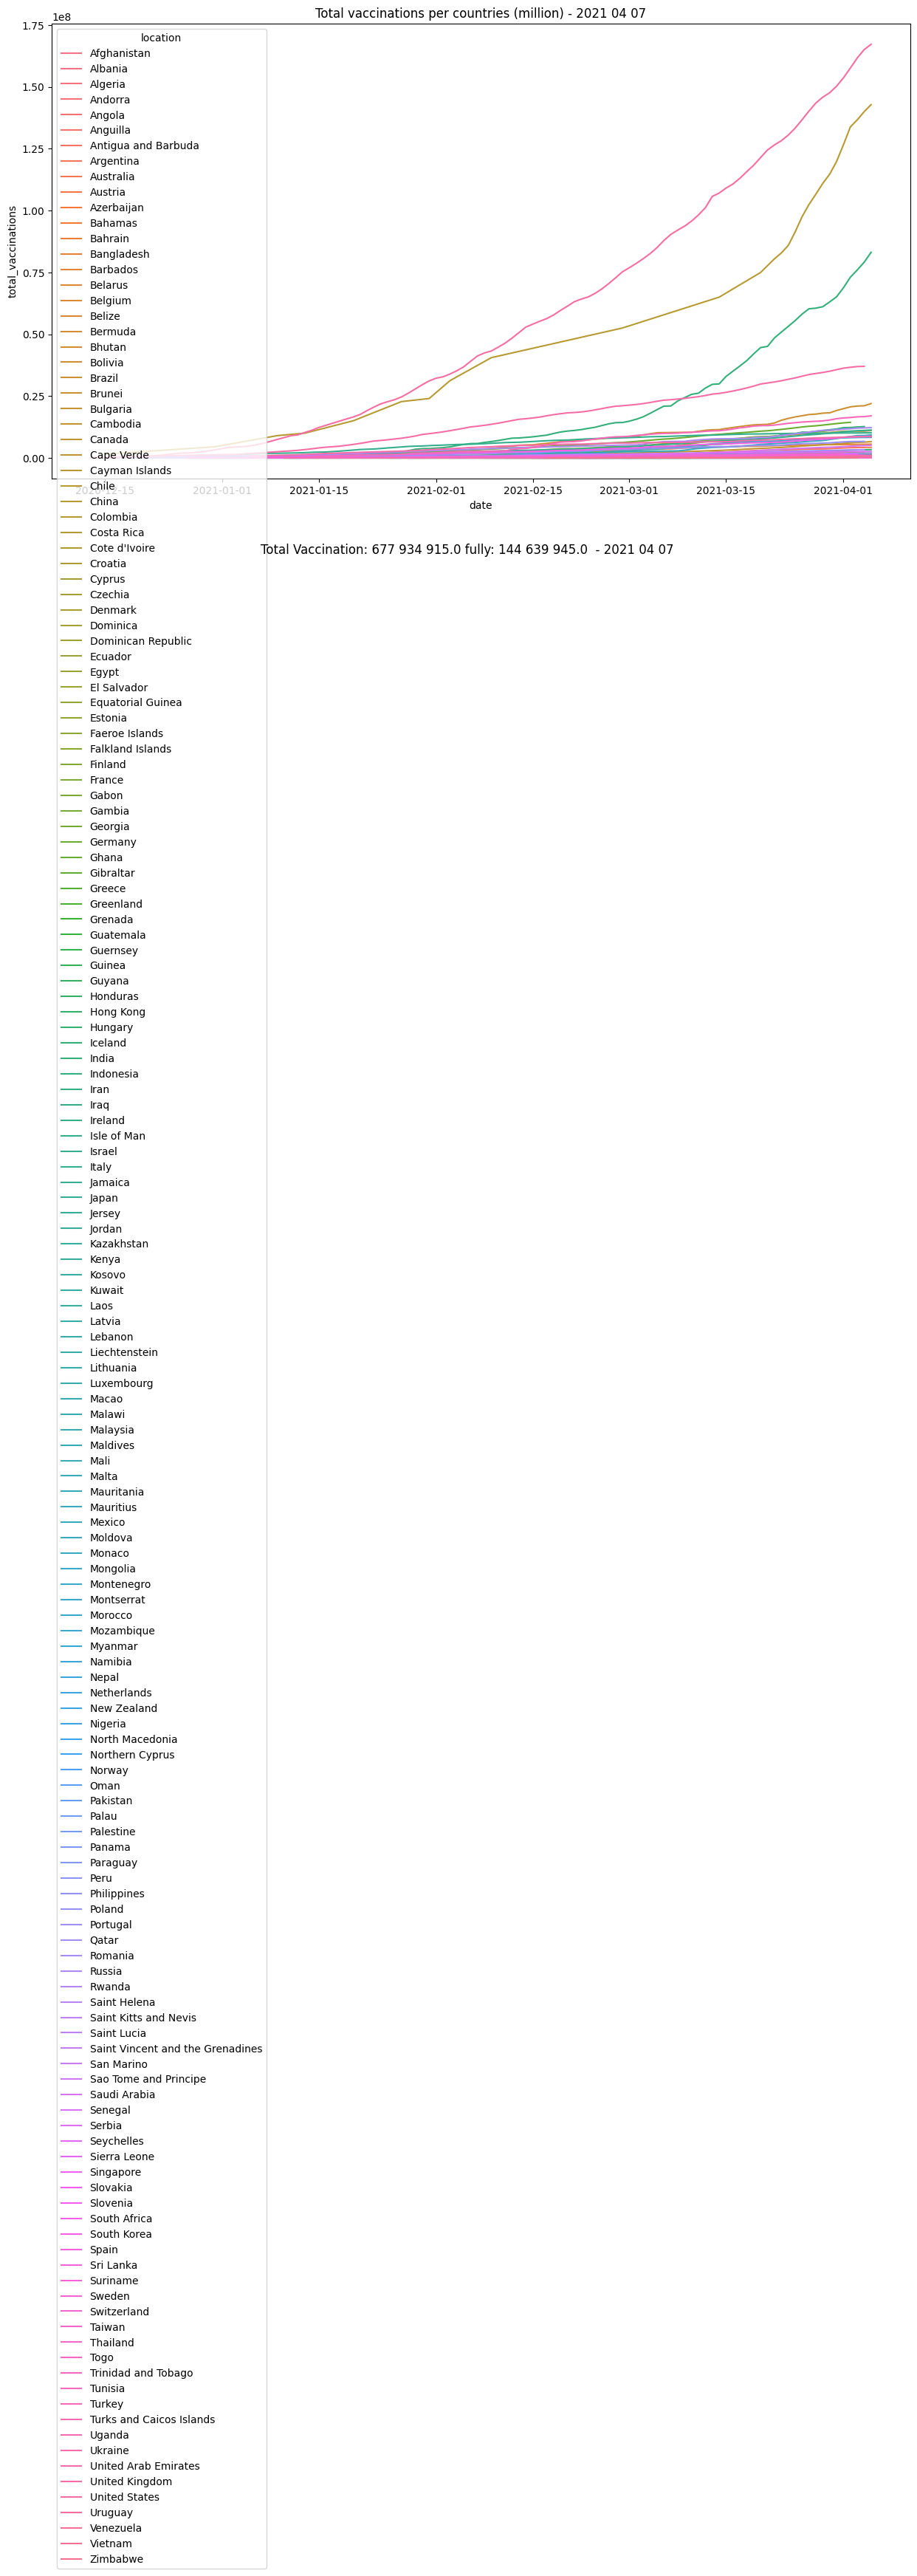

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Total vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
#plotLatestFullyCountries = plotLatestCountries[plotLatestCountries[people_fully_vaccinated] > 0]

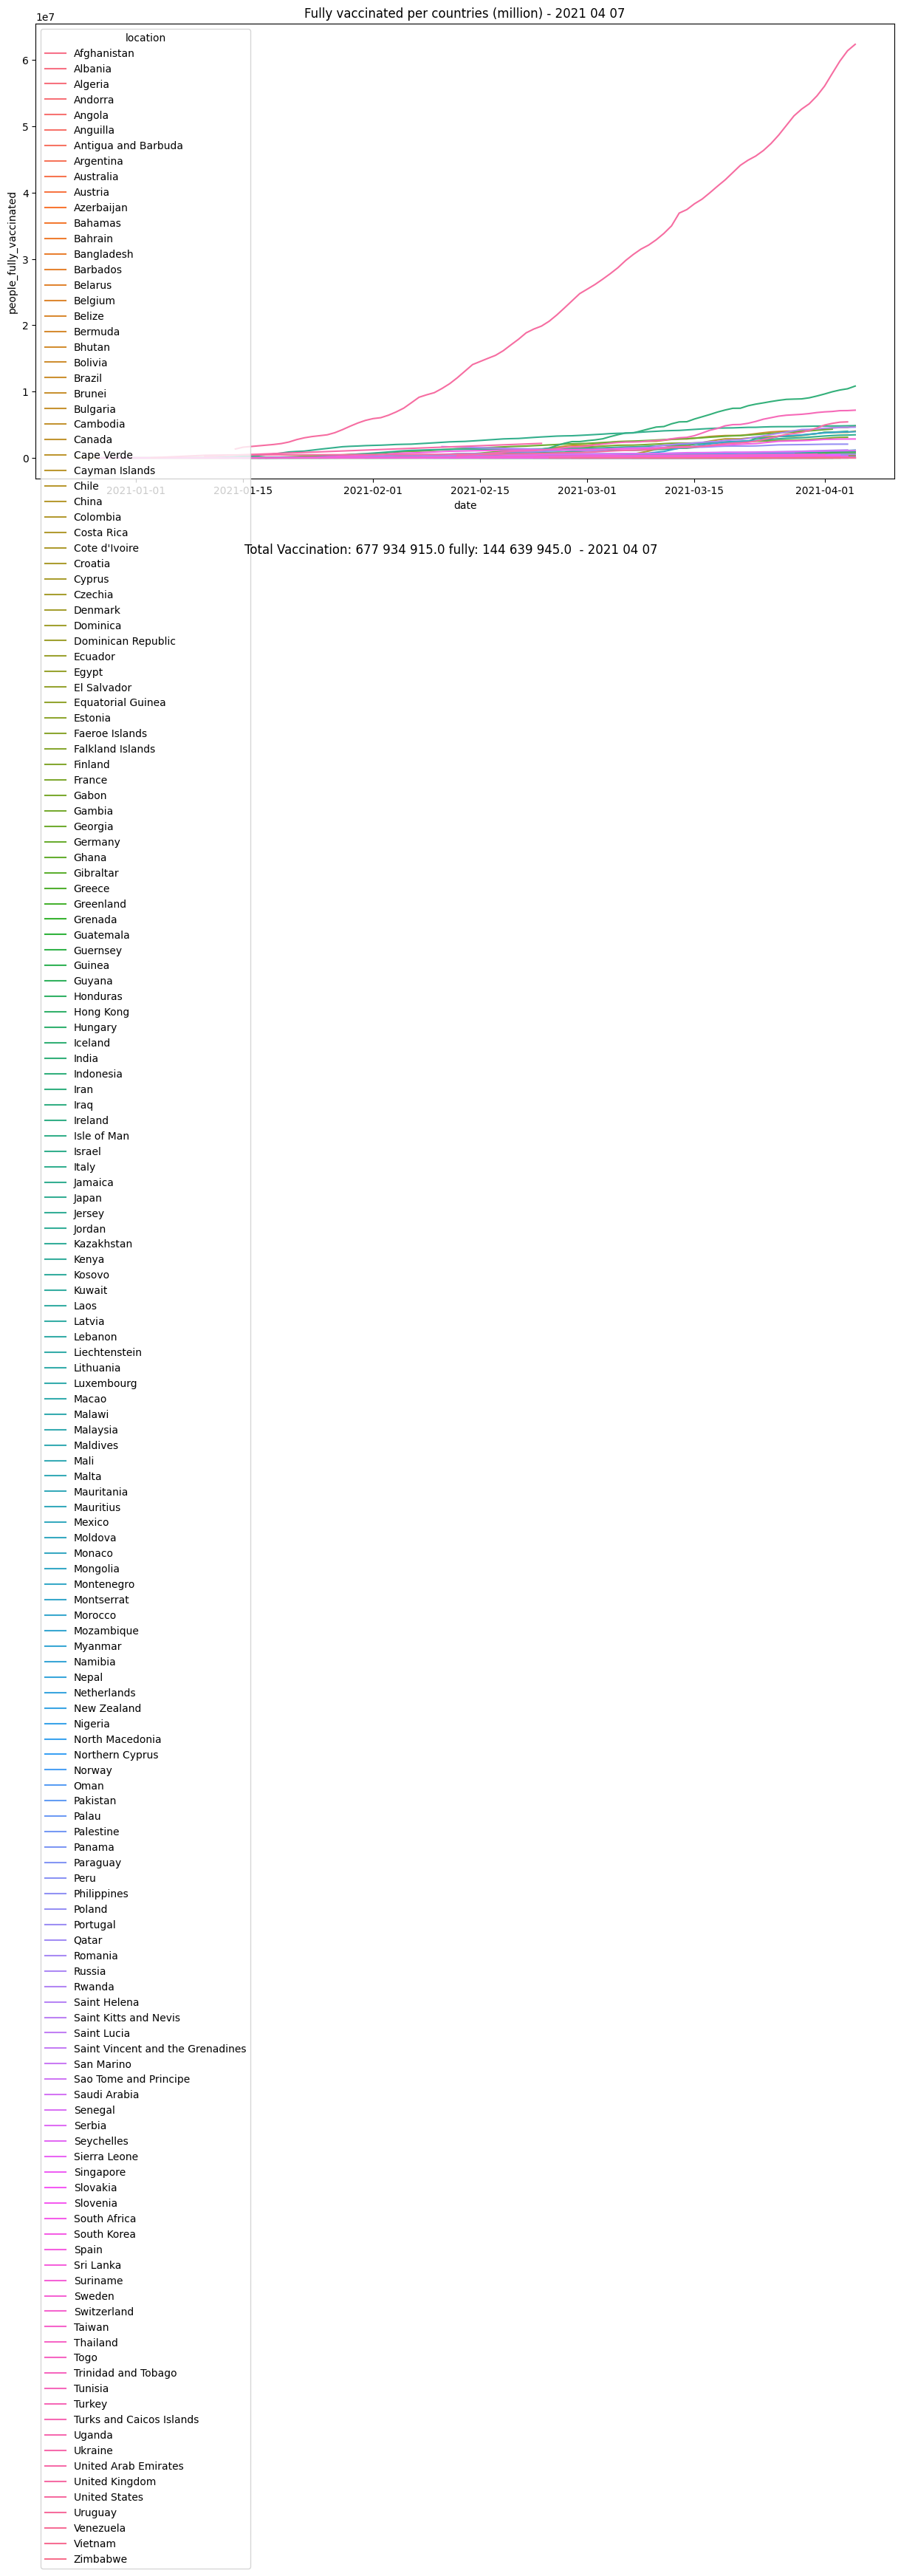

In [13]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="people_fully_vaccinated", hue="location" )
plt.title("Fully vaccinated per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/CoronaFully_Line.png',bbox_inches='tight')  
plt.show() 


In [14]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 6112
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 5760 non-null   object        
 1   date                     5760 non-null   datetime64[ns]
 2   vaccine                  5760 non-null   object        
 3   source_url               5760 non-null   object        
 4   total_vaccinations       5685 non-null   float64       
 5   people_vaccinated        5059 non-null   float64       
 6   people_fully_vaccinated  4190 non-null   float64       
 7   iso_code                 5758 non-null   object        
 8   vaccines                 5758 non-null   object        
 9   last_observation_date    5758 non-null   object        
 10  source_name              5758 non-null   object        
 11  source_website           5758 non-null   object        
 12  _merge                   5760 non-

In [15]:
allCountriesFiltered

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
0,Afghanistan,2021-02-22,Oxford/AstraZeneca,https://tolonews.com/index.php/health-170225,0.0,0.0,NaN,AFG,Oxford/AstraZeneca,2021-03-16,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,both
1,Afghanistan,2021-02-28,Oxford/AstraZeneca,https://tolonews.com/index.php/health-170355,8200.0,8200.0,NaN,AFG,Oxford/AstraZeneca,2021-03-16,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,both
2,Afghanistan,2021-03-16,Oxford/AstraZeneca,http://www.xinhuanet.com/english/asiapacific/2...,54000.0,54000.0,NaN,AFG,Oxford/AstraZeneca,2021-03-16,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,both
3,Albania,2021-01-10,Pfizer/BioNTech,https://www.france24.com/en/live-news/20210111...,0.0,0.0,NaN,ALB,"Pfizer/BioNTech, Sinovac",2021-04-05,Ministry of Health,https://twitter.com/gmanastirliu/status/137915...,both
4,Albania,2021-01-12,Pfizer/BioNTech,https://shendetesia.gov.al/dita-iii-e-vaksinim...,128.0,128.0,NaN,ALB,"Pfizer/BioNTech, Sinovac",2021-04-05,Ministry of Health,https://twitter.com/gmanastirliu/status/137915...,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6108,Zimbabwe,2021-03-30,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1377160530...,85866.0,72944.0,12922.0,ZWE,Sinopharm/Beijing,2021-04-03,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,both
6109,Zimbabwe,2021-03-31,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1377348932...,91880.0,76995.0,14885.0,ZWE,Sinopharm/Beijing,2021-04-03,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,both
6110,Zimbabwe,2021-04-01,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1377688318...,105307.0,87791.0,17516.0,ZWE,Sinopharm/Beijing,2021-04-03,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,both
6111,Zimbabwe,2021-04-02,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1378053949...,124753.0,103815.0,20938.0,ZWE,Sinopharm/Beijing,2021-04-03,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...,both


In [16]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


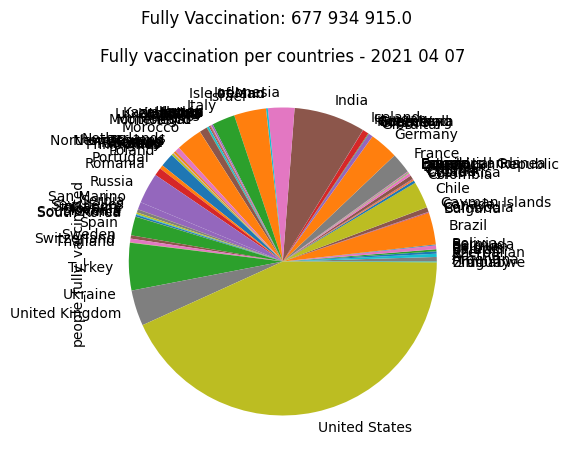

In [17]:
#people_fully_vaccinated
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["people_fully_vaccinated"].plot( y='location',kind = 'pie') 
plt.title("Fully vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Fully Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_FuVaccinationperCountry.png')  
plt.show() 


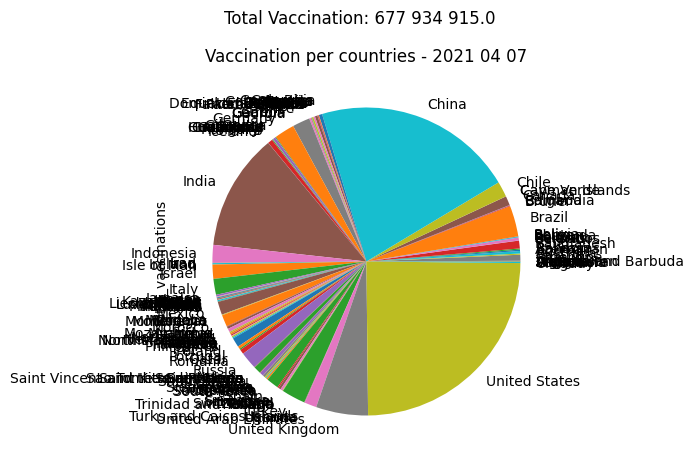

In [18]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [19]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code
location,,,,,
United States,167187795.0,107515428.0,62392065.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",USA
China,142802000.0,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",CHN
India,83110926.0,72277309.0,10833617.0,"Covaxin, Oxford/AstraZeneca",IND
United Kingdom,37013749.0,31581623.0,5432126.0,"Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Brazil,21960953.0,17128933.0,4832020.0,"Oxford/AstraZeneca, Sinovac",BRA
...,...,...,...,...,...
Mauritania,1366.0,1366.0,0.0,Sinopharm/Beijing,MRT
Montserrat,1306.0,1112.0,194.0,Oxford/AstraZeneca,MSR
Trinidad and Tobago,991.0,991.0,NaN,Oxford/AstraZeneca,TTO


In [20]:
plotLatestCountries.shape

(163, 5)

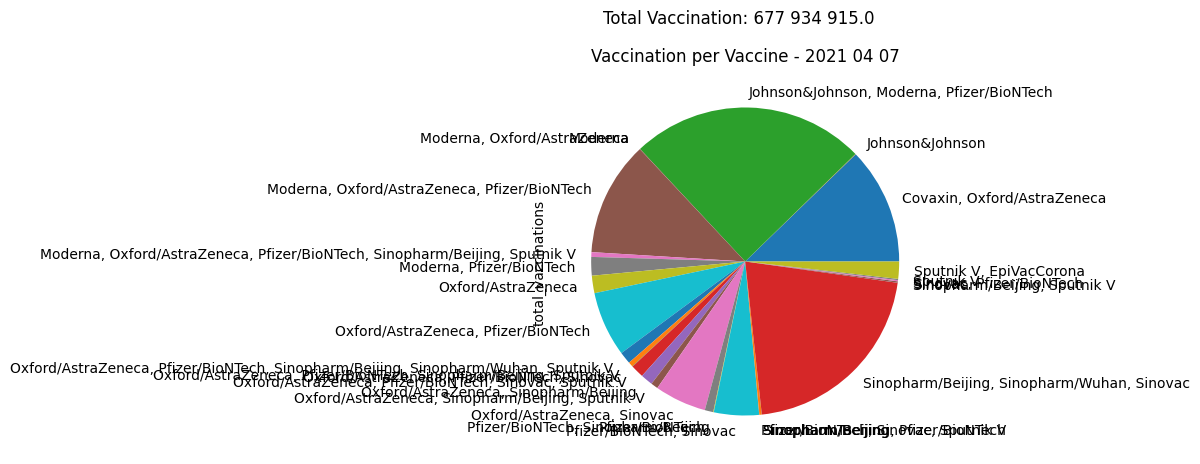

In [21]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [22]:
plotVaccine.sort_values(ascending=True)

vaccine
Moderna, Oxford/AstraZeneca                                                               52772.0
Sinopharm/Beijing, Pfizer/BioNTech                                                        56530.0
Sinopharm/Beijing, Sputnik V                                                              72363.0
Pfizer/BioNTech, Sinovac, Sputnik V                                                       98057.0
Moderna                                                                                  119330.0
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                             231299.0
Johnson&Johnson                                                                          269102.0
Pfizer/BioNTech, Sinopharm/Beijing                                                       409203.0
Sinovac, Pfizer/BioNTech                                                                 823477.0
Sputnik V                                                                                921021.0
Sinovac     

In [23]:
# Sweden have 10 000 doses....
#allCountries

In [24]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-04-07 04:45:10.634079
Time elapsed (hh:mm:ss.ms) 0:00:39.036440


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [25]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  195 non-null    object
 1   continent            195 non-null    object
 2   memberEU             195 non-null    object
 3   country              195 non-null    object
 4   qid                  195 non-null    object
 5   population           195 non-null    object
 6   ISO3166_1            195 non-null    object
 7   nominalGDPperCapita  0 non-null      object
 8   G20                  195 non-null    object
 9   IMF                  195 non-null    object
 10  genderH              195 non-null    object
dtypes: object(11)
memory usage: 16.9+ KB


In [26]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
6,http://www.wikidata.org/entity/Q1007,Africa,false,Guinea-Bissau,Q1007,1861283,GNB,None,false,false,male
60,http://www.wikidata.org/entity/Q1029,Africa,false,Mozambique,Q1029,29668834,MOZ,None,false,false,male
16,http://www.wikidata.org/entity/Q241,North America,false,Cuba,Q241,11484636,CUB,None,false,false,male
11,http://www.wikidata.org/entity/Q970,Africa,false,Comoros,Q970,823652,COM,None,false,false,male
17,http://www.wikidata.org/entity/Q902,Asia,false,Bangladesh,Q902,164669751,BGD,None,false,false,female


In [27]:
plotLatestCountries

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code
location,,,,,
Afghanistan,54000.0,54000.0,NaN,Oxford/AstraZeneca,AFG
Albania,206708.0,NaN,NaN,"Pfizer/BioNTech, Sinovac",ALB
Algeria,75000.0,NaN,NaN,Sputnik V,DZA
Andorra,12440.0,NaN,NaN,Pfizer/BioNTech,AND
Angola,130750.0,130750.0,NaN,Oxford/AstraZeneca,AGO
...,...,...,...,...,...
United States,167187795.0,107515428.0,62392065.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",USA
Uruguay,823477.0,727680.0,95797.0,"Sinovac, Pfizer/BioNTech",URY
Venezuela,98000.0,98000.0,NaN,Sputnik V,VEN


In [28]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,54000.0,54000.0,NaN,Oxford/AstraZeneca,AFG,http://www.wikidata.org/entity/Q889,Asia,false,Afghanistan,Q889,36643815,AFG,None,false,false,male,both
1,206708.0,NaN,NaN,"Pfizer/BioNTech, Sinovac",ALB,http://www.wikidata.org/entity/Q222,Europe,false,Albania,Q222,3020209,ALB,None,false,false,male,both
2,75000.0,NaN,NaN,Sputnik V,DZA,http://www.wikidata.org/entity/Q262,Africa,false,Algeria,Q262,41318142,DZA,None,false,false,male,both
3,12440.0,NaN,NaN,Pfizer/BioNTech,AND,http://www.wikidata.org/entity/Q228,Europe,false,Andorra,Q228,76177,AND,None,false,false,male,both
4,130750.0,130750.0,NaN,Oxford/AstraZeneca,AGO,http://www.wikidata.org/entity/Q916,Africa,false,Angola,Q916,29784193,AGO,None,false,false,male,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,167187795.0,107515428.0,62392065.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",USA,http://www.wikidata.org/entity/Q30,Oceania,false,United States of America,Q30,328239523,USA,None,true,false,male,both
140,823477.0,727680.0,95797.0,"Sinovac, Pfizer/BioNTech",URY,http://www.wikidata.org/entity/Q77,South America,false,Uruguay,Q77,3456750,URY,None,false,false,male,both
141,98000.0,98000.0,NaN,Sputnik V,VEN,http://www.wikidata.org/entity/Q717,South America,false,Venezuela,Q717,28515829,VEN,None,false,false,male,both
142,52335.0,52335.0,0.0,Oxford/AstraZeneca,VNM,http://www.wikidata.org/entity/Q881,Asia,false,Vietnam,Q881,94660000,VNM,None,false,false,male,both


In [29]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       144 non-null    float64 
 1   people_vaccinated        125 non-null    float64 
 2   people_fully_vaccinated  104 non-null    float64 
 3   vaccine                  144 non-null    object  
 4   iso_code                 144 non-null    object  
 5   cid                      144 non-null    object  
 6   continent                144 non-null    object  
 7   memberEU                 144 non-null    int64   
 8   country                  144 non-null    object  
 9   qid                      144 non-null    object  
 10  population               144 non-null    int64   
 11  ISO3166_1                144 non-null    object  
 12  nominalGDPperCapita      0 non-null      float64 
 13  G20                      144 non-null    int64   
 14  IMF       

In [30]:
#CountriesData

In [31]:
CountriesData['Country'] = CountriesData.index

In [32]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
people_vaccinated                  0.990358
people_fully_vaccinated            0.951411
memberEU                          -0.041754
population                         0.761340
nominalGDPperCapita                     NaN
G20                                0.491245
IMF                                0.017126
genderFlag                         0.053816
Country                            0.046887
vaccinations_population_percent    0.174647
Name: total_vaccinations, dtype: float64

In [33]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.174647
people_vaccinated                  0.223591
people_fully_vaccinated            0.248425
memberEU                           0.142732
population                        -0.049273
nominalGDPperCapita                     NaN
G20                                0.031486
IMF                               -0.021769
genderFlag                        -0.040543
Country                            0.078379
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [34]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


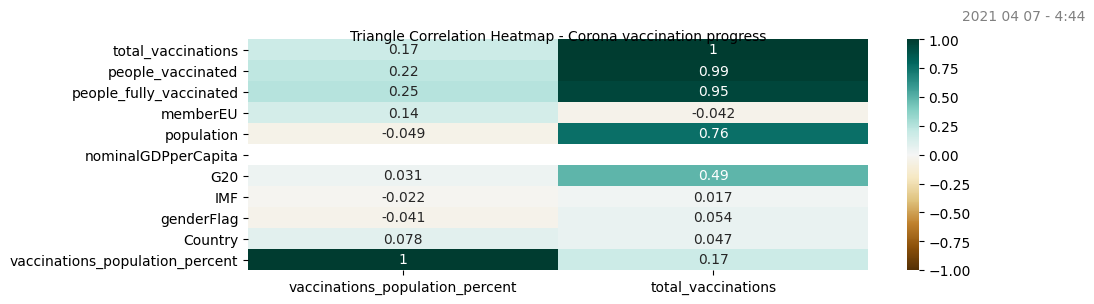

In [35]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [36]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,country,G20,vaccinations_population_percent,memberEU,population,total_vaccinations,continent,IMF
61,Israel,0,111.507060,0,9093000,10139337.0,Asia,0
117,Seychelles,0,106.507518,0,95843,102080.0,Africa,0
137,United Arab Emirates,0,91.453079,0,9400145,8596722.0,Asia,0
25,Chile,0,61.259473,0,18054726,11060230.0,South America,0
17,Bhutan,0,57.985538,0,807610,468297.0,Asia,0
...,...,...,...,...,...,...,...,...
129,Taiwan,0,0.073091,0,23593794,17245.0,Asia,0
132,Trinidad and Tobago,0,0.072382,0,1369125,991.0,North America,0
142,Vietnam,0,0.055287,0,94660000,52335.0,Asia,0
80,Mauritania,0,0.030904,0,4420184,1366.0,Africa,0


## Vaccination numbers % of population

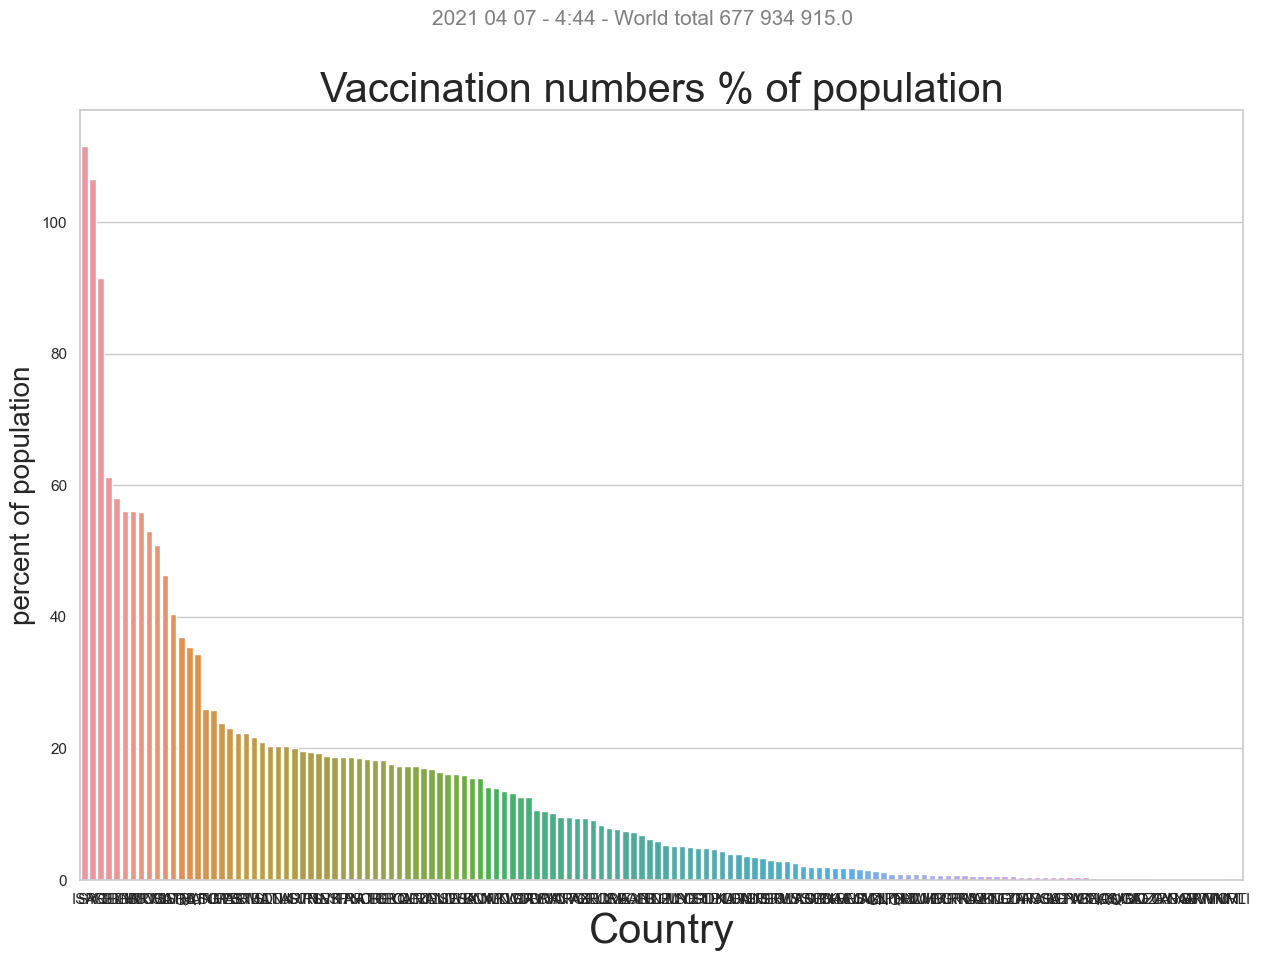

In [37]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

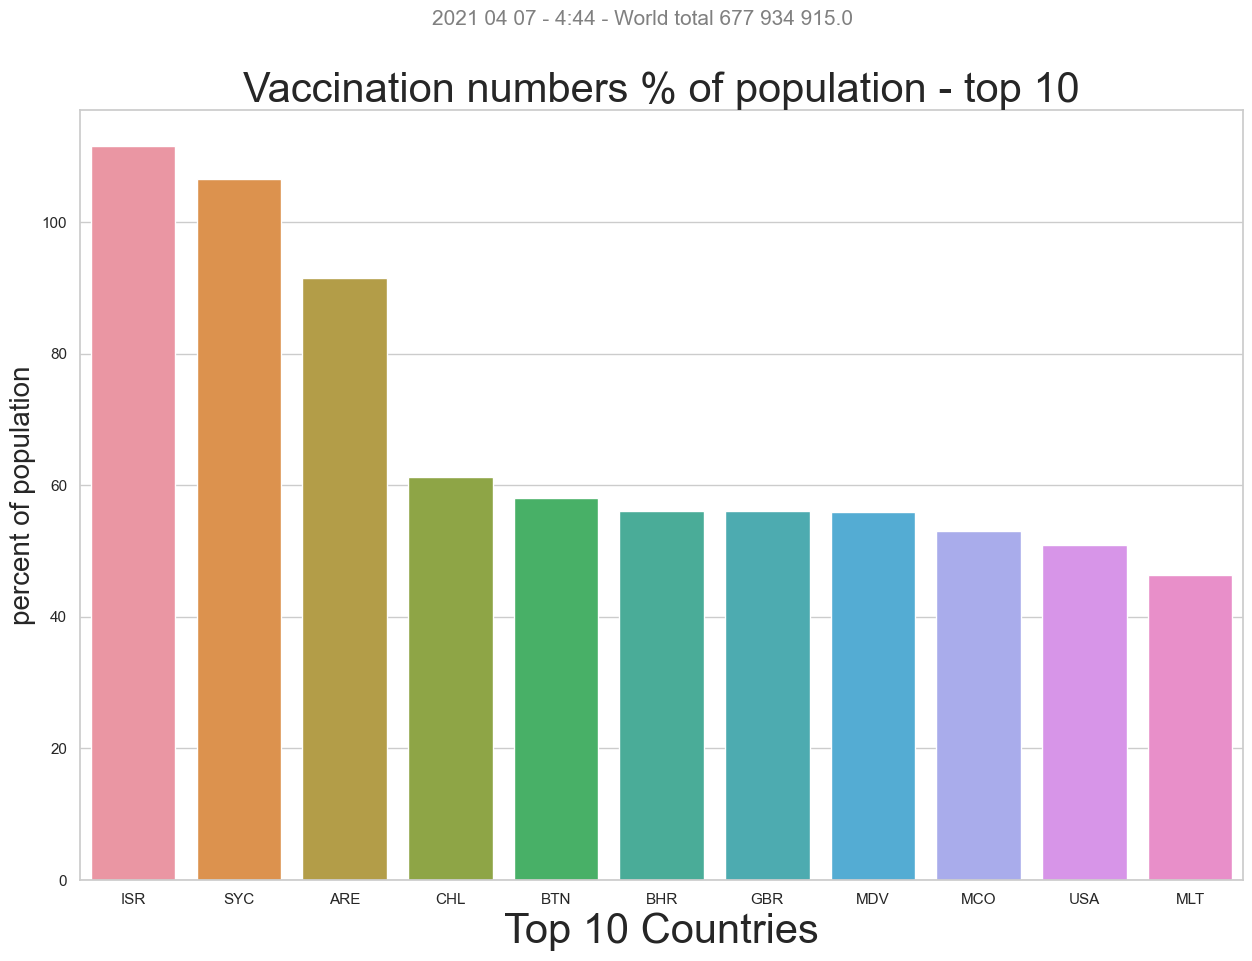

In [38]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

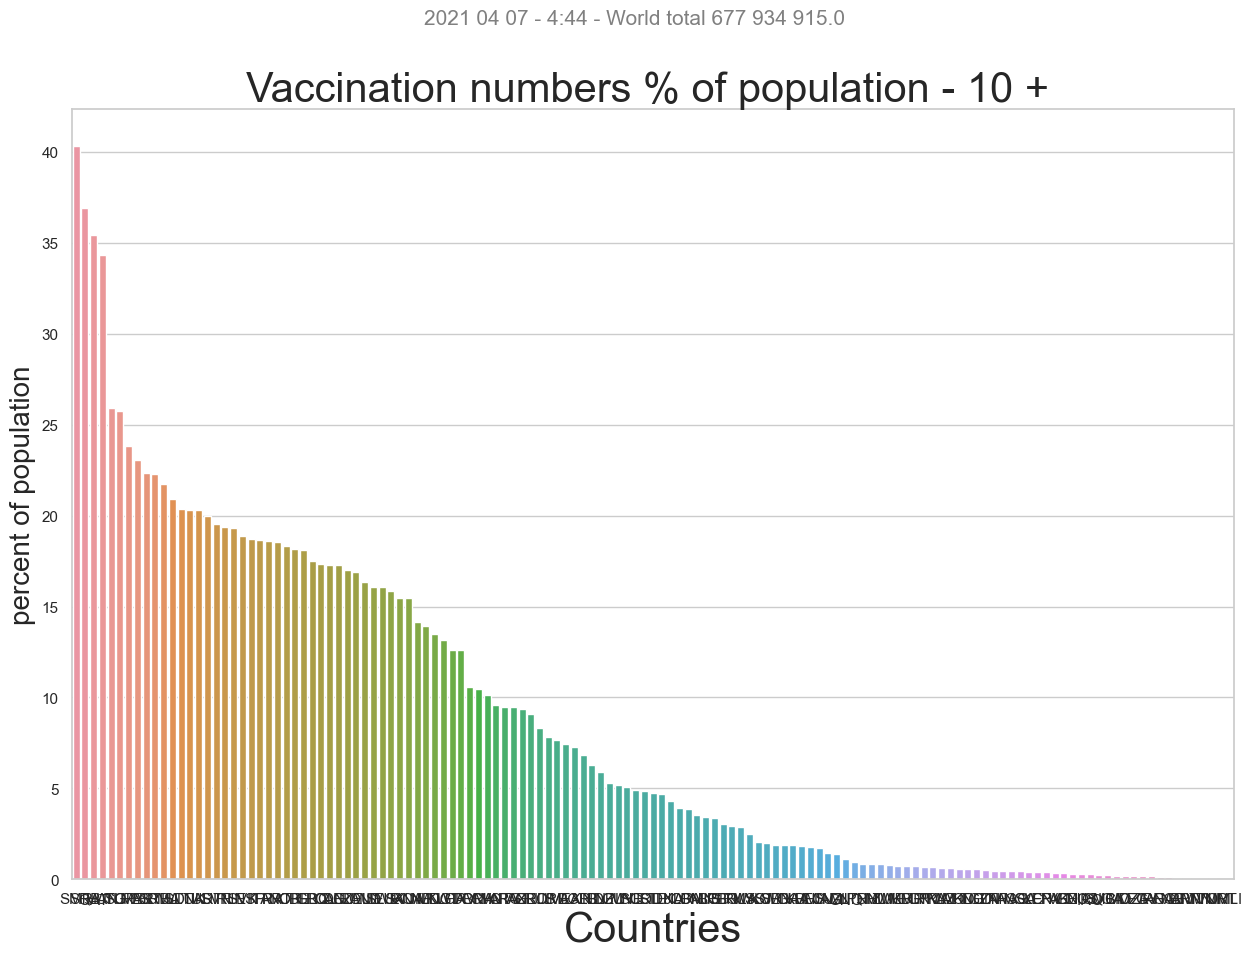

In [39]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


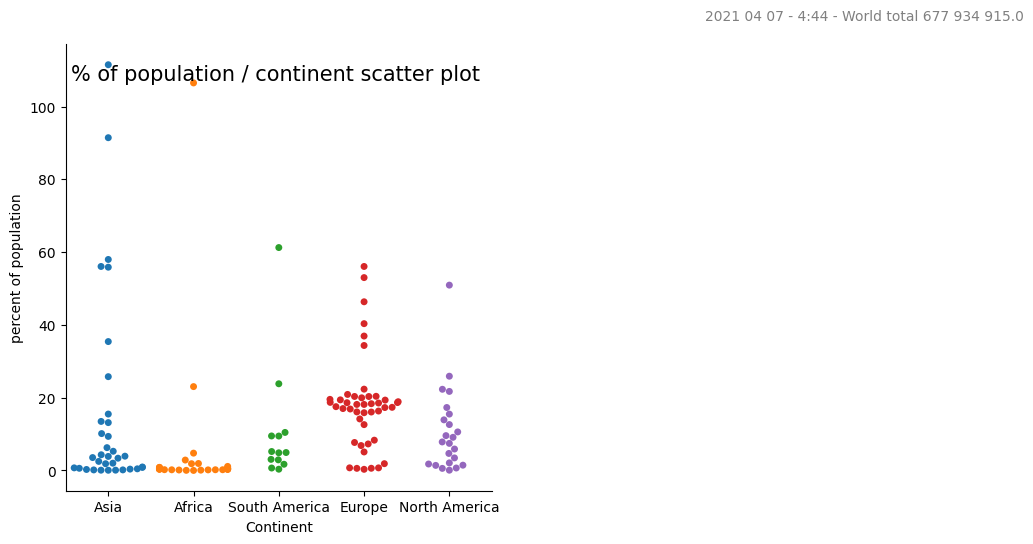

In [40]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

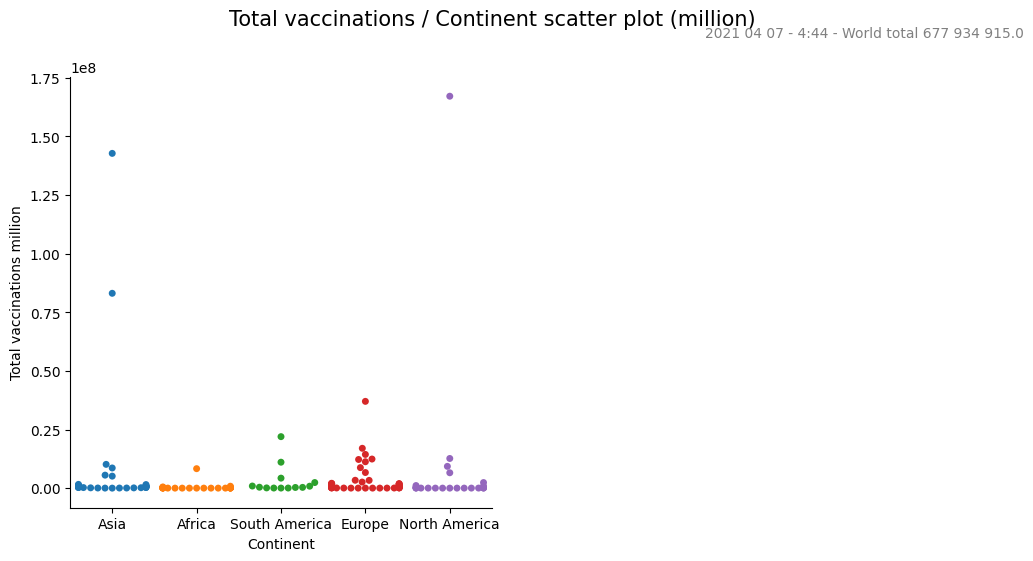

In [41]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


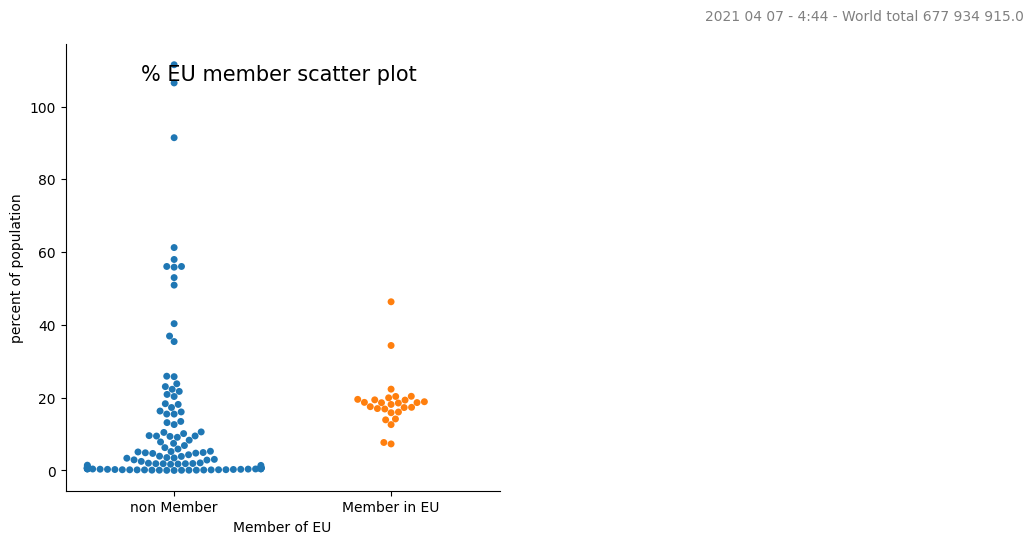

In [43]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


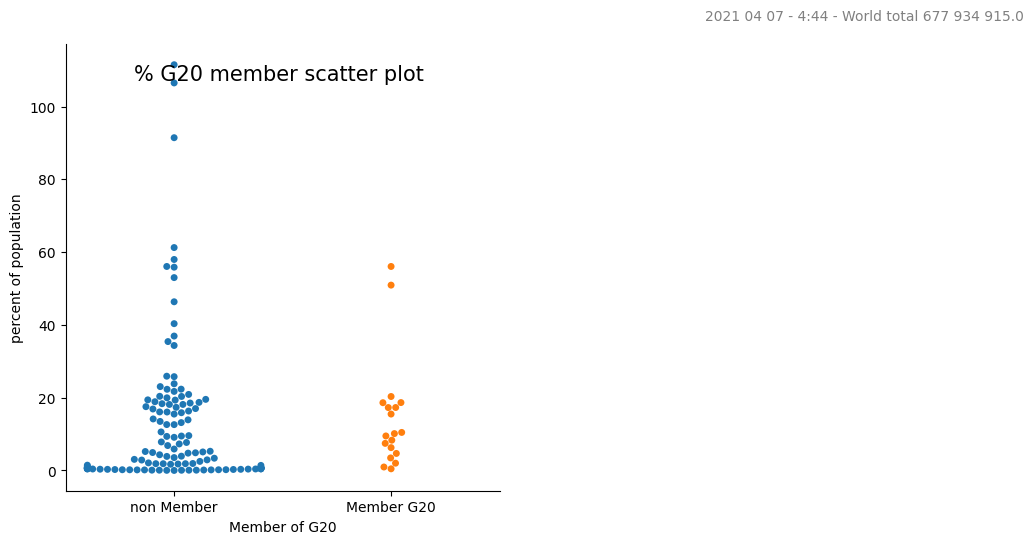

In [44]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


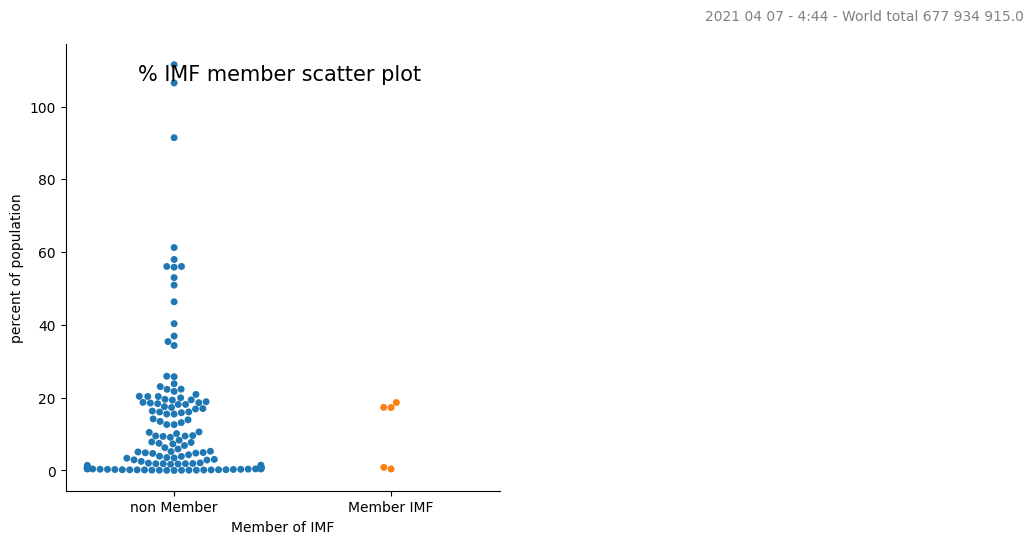

In [45]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [46]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


677 934 915.0 (163, 5) 150 580 176.0


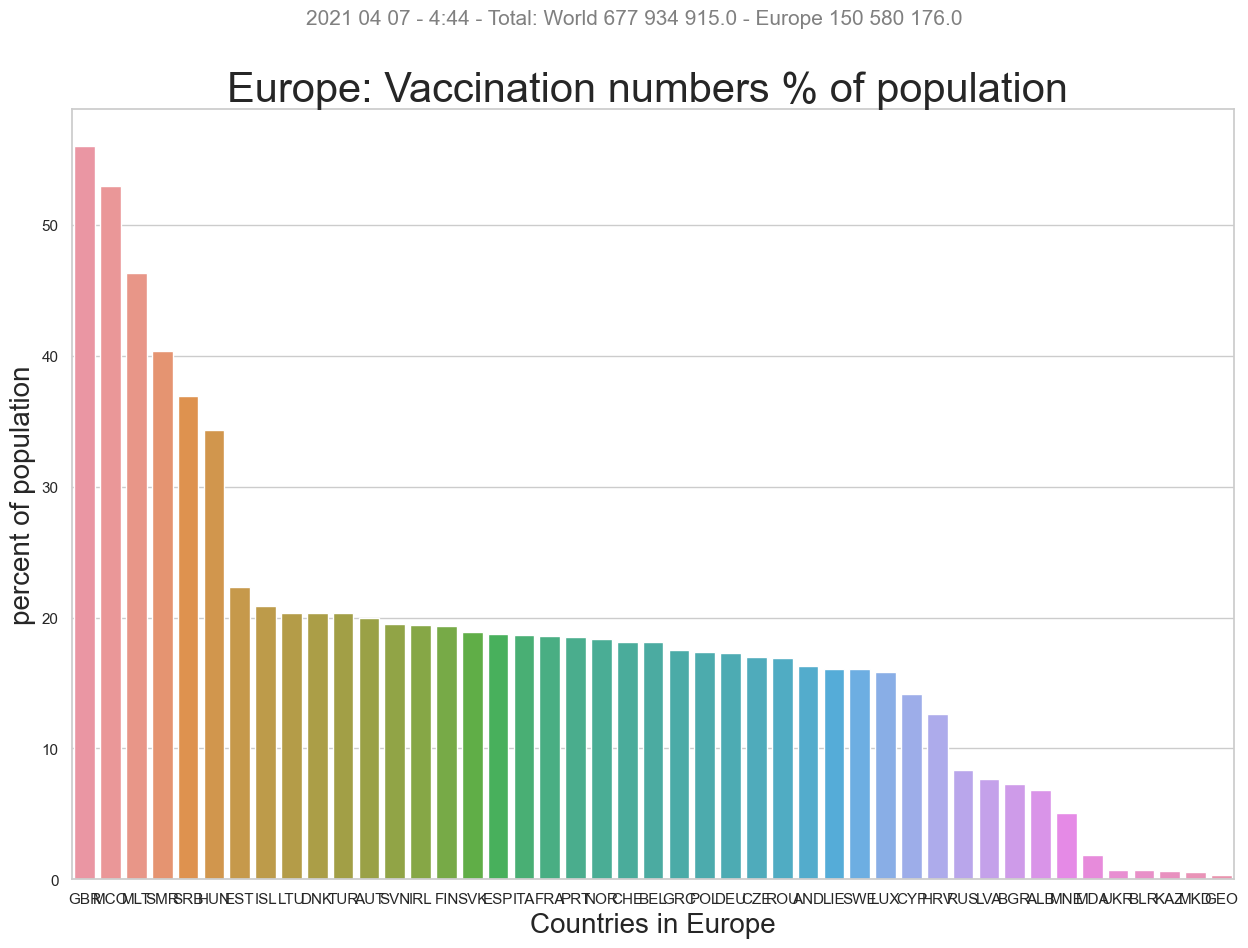

In [47]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [48]:
#CountriesDataEurope

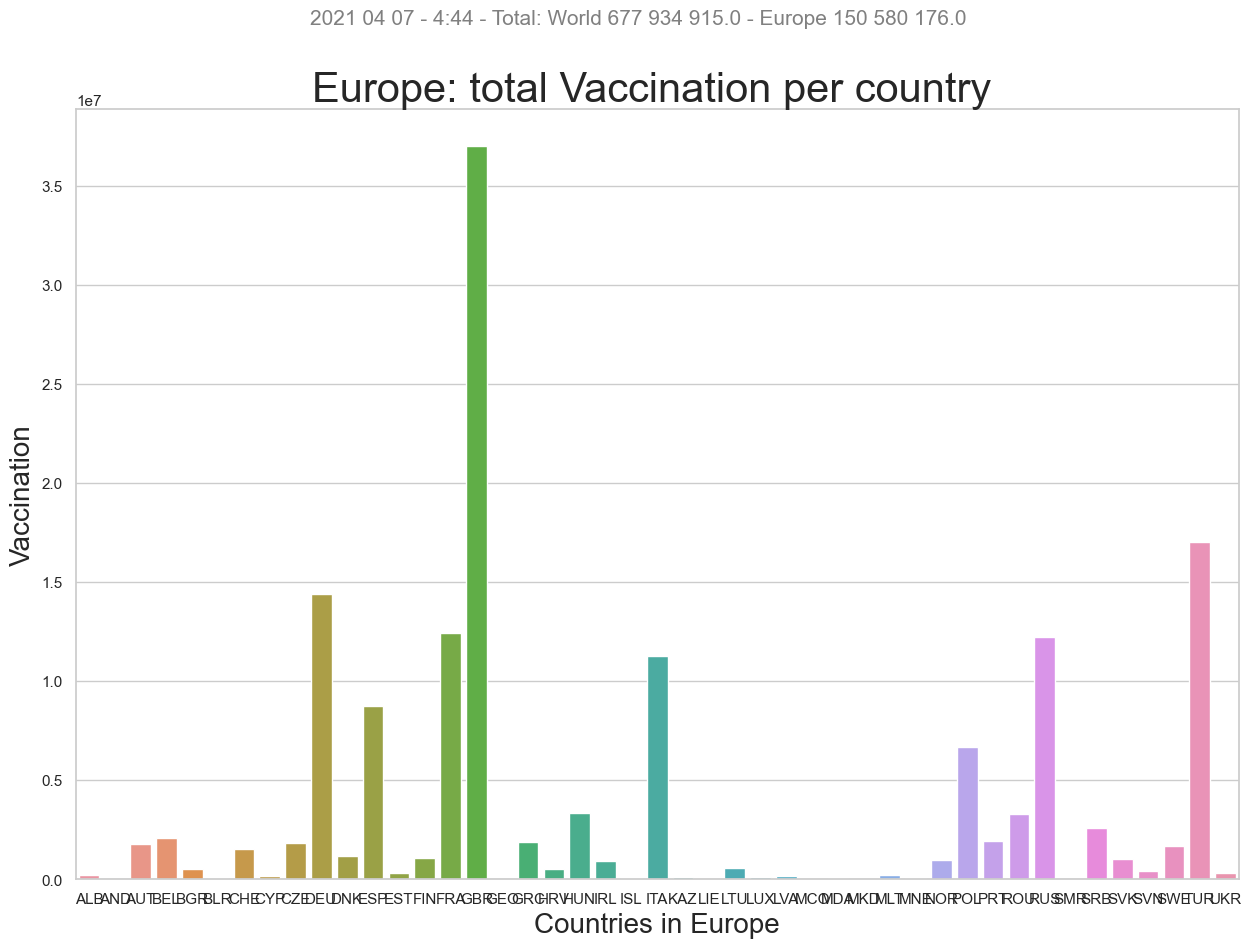

In [49]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [50]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,country_x,head_gender,vaccinations_population_percent,memberEU,total_vaccinations,ISO3166_1
19,Albania,male,6.844162,non Member,206708.0,ALB
44,Andorra,male,16.330388,non Member,12440.0,AND
22,Armenia,male,0.000000,non Member,0.0,ARM
6,Austria,male,19.963420,Member in EU,1758620.0,AUT
17,Belgium,male,18.139072,Member in EU,2073551.0,BEL
5,Bulgaria,male,7.286374,Member in EU,510049.0,BGR
28,Bosnia and Herzegovina,male,0.000000,non Member,0.0,BIH
9,Belarus,male,0.708069,non Member,66618.0,BLR
34,Switzerland,male,18.145321,non Member,1536186.0,CHE
37,Cyprus,male,14.154470,Member in EU,161526.0,CYP


## All countries on continent Europe

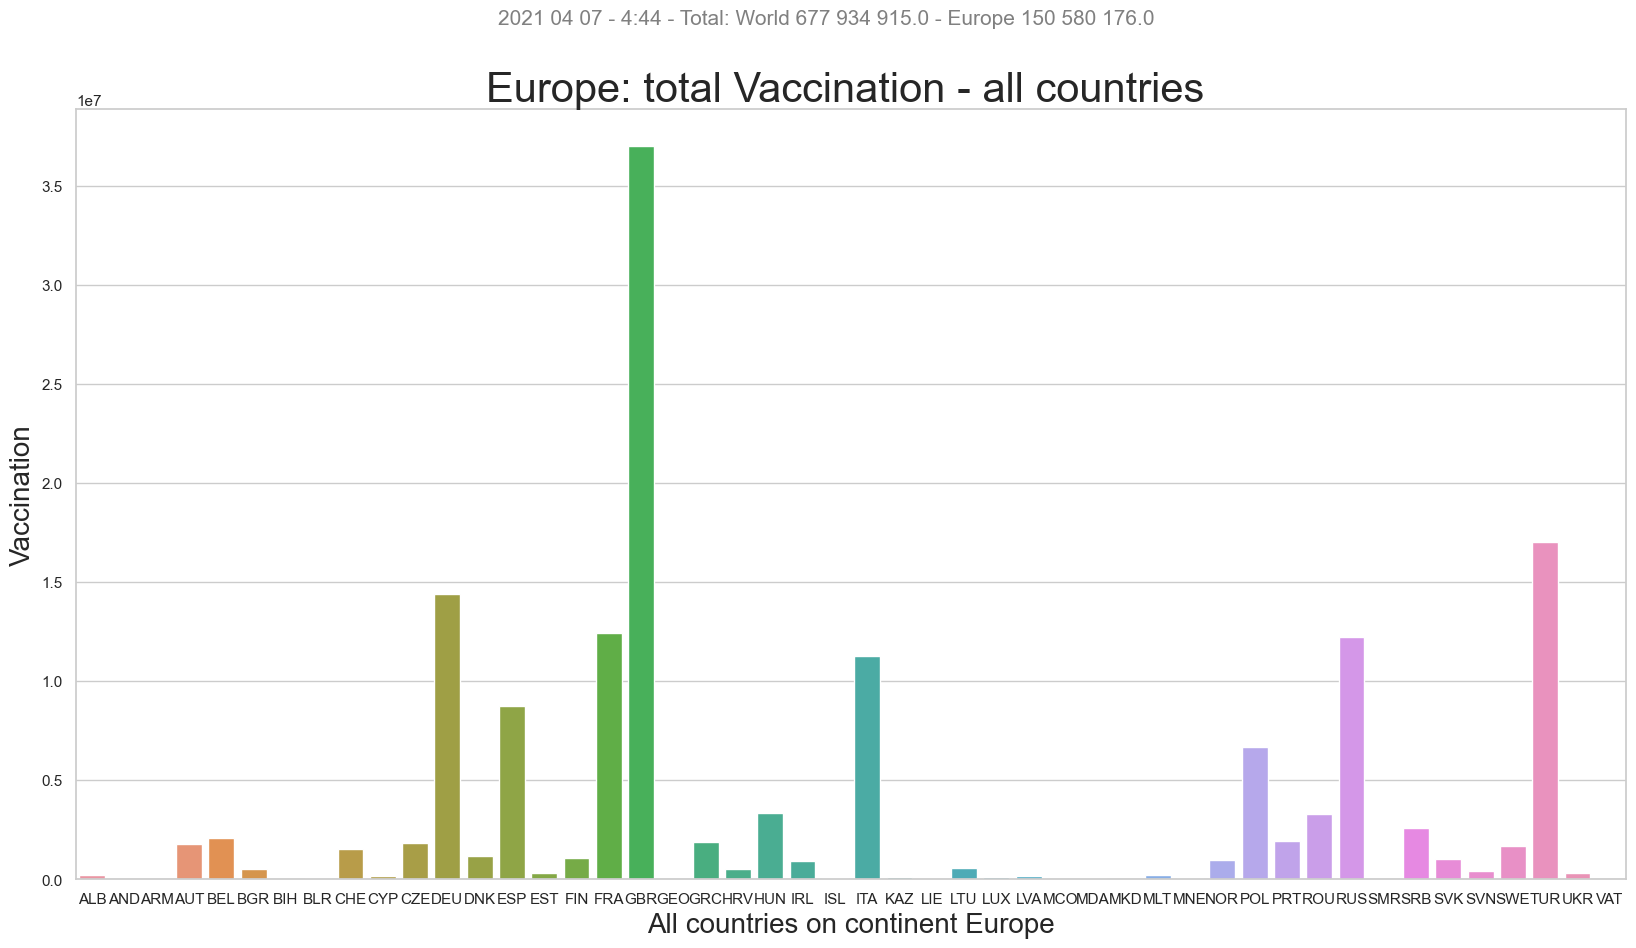

In [51]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [52]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 19 to 13
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_x                        48 non-null     object 
 1   head_gender                      48 non-null     object 
 2   vaccinations_population_percent  48 non-null     float64
 3   memberEU                         48 non-null     object 
 4   total_vaccinations               48 non-null     float64
 5   ISO3166_1                        48 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.7+ KB


In [53]:
CountriesDataEuropeAll


,country_x,head_gender,vaccinations_population_percent,memberEU,total_vaccinations,ISO3166_1
19,Albania,male,6.844162,non Member,206708.0,ALB
44,Andorra,male,16.330388,non Member,12440.0,AND
22,Armenia,male,0.000000,non Member,0.0,ARM
6,Austria,male,19.963420,Member in EU,1758620.0,AUT
17,Belgium,male,18.139072,Member in EU,2073551.0,BEL
5,Bulgaria,male,7.286374,Member in EU,510049.0,BGR
28,Bosnia and Herzegovina,male,0.000000,non Member,0.0,BIH
9,Belarus,male,0.708069,non Member,66618.0,BLR
34,Switzerland,male,18.145321,non Member,1536186.0,CHE
37,Cyprus,male,14.154470,Member in EU,161526.0,CYP


### Countries in EU

In [54]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

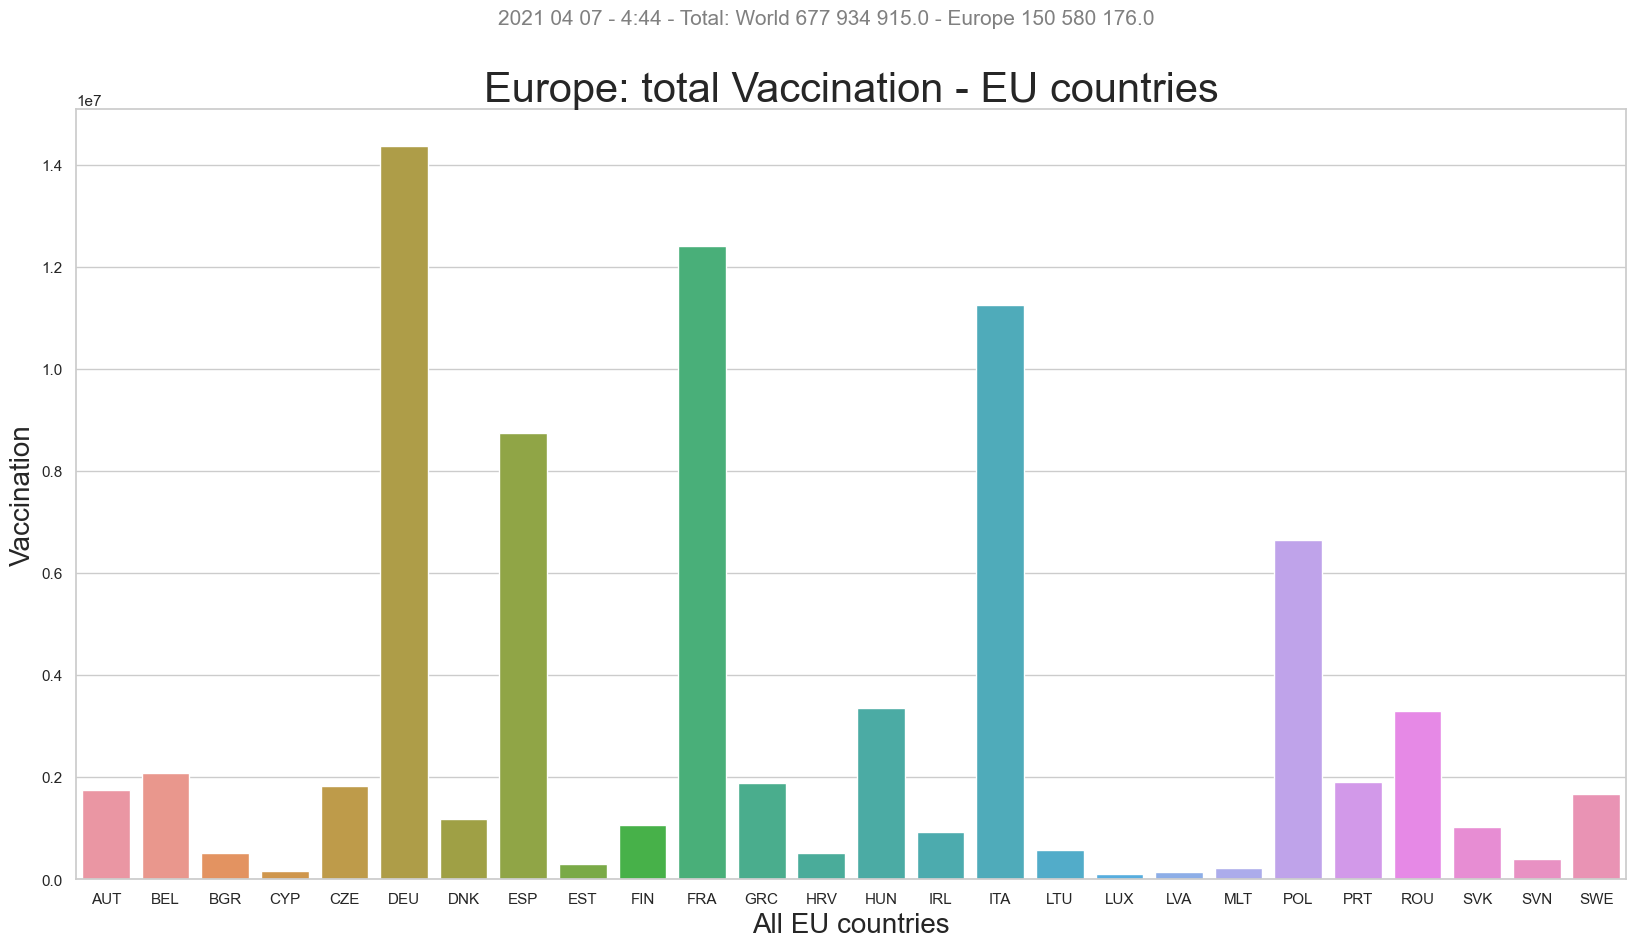

In [55]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

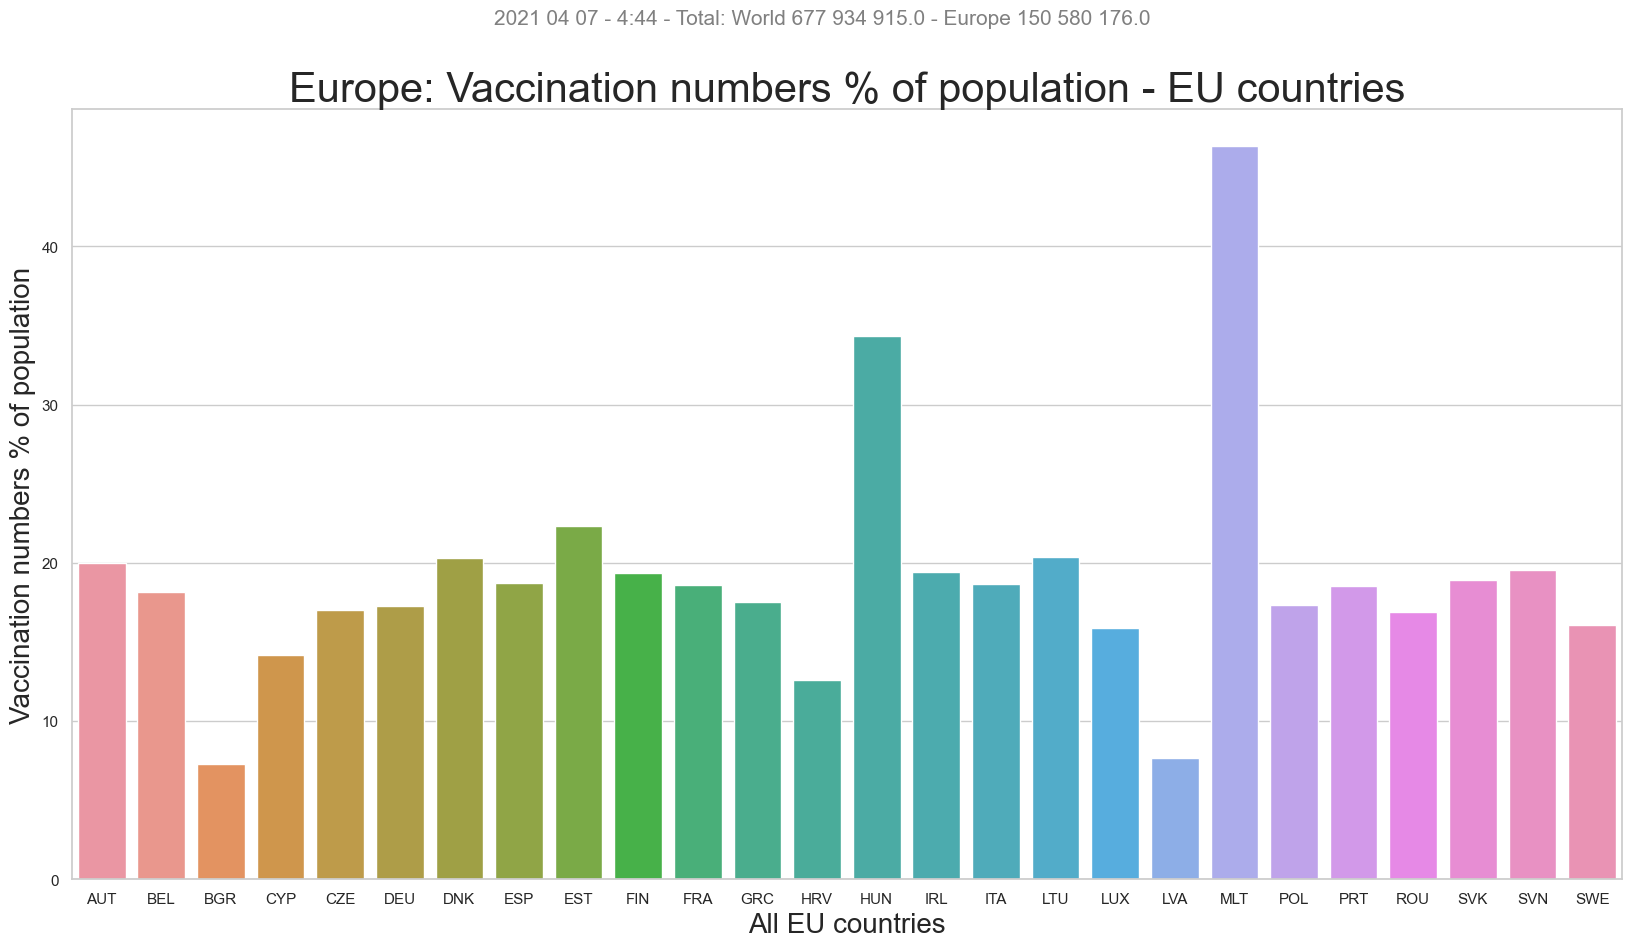

In [56]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [57]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,country,head_gender,vaccinations_population_percent,memberEU,total_vaccinations,ISO3166-1
6,Austria,male,19.963420,Member in EU,1758620.0,AUT
17,Belgium,male,18.139072,Member in EU,2073551.0,BEL
5,Bulgaria,male,7.286374,Member in EU,510049.0,BGR
37,Cyprus,male,14.154470,Member in EU,161526.0,CYP
23,Czech Republic,male,17.007353,Member in EU,1818756.0,CZE
15,Germany,female,17.287082,Member in EU,14374088.0,DEU
21,Denmark,female,20.334286,Member in EU,1184973.0,DNK
45,Spain,male,18.709877,Member in EU,8743694.0,ESP
25,Estonia,female,22.344998,Member in EU,296031.0,EST
3,Finland,female,19.339423,Member in EU,1063870.0,FIN


### Countries in EU not delivering Vaccination statistics

In [58]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,memberEU,country,ISO3166-1,total_vaccinations


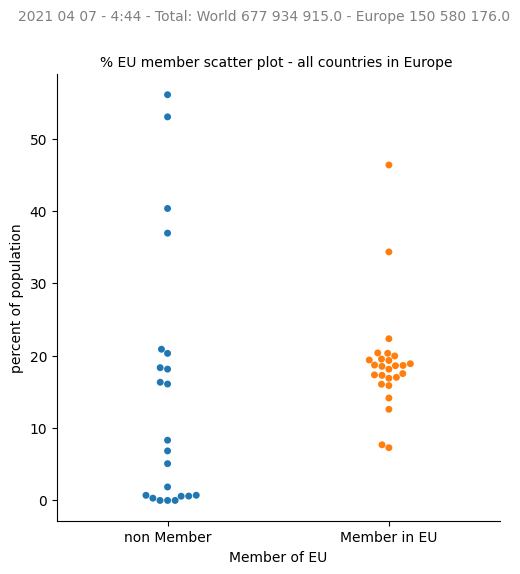

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 19 to 13
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          48 non-null     object 
 1   head_gender                      48 non-null     object 
 2   vaccinations_population_percent  48 non-null     float64
 3   memberEU                         48 non-null     object 
 4   total_vaccinations               48 non-null     float64
 5   ISO3166-1                        48 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.7+ KB


In [61]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

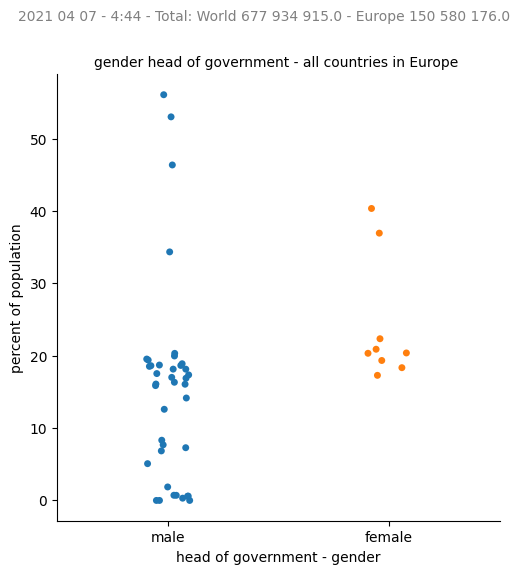

In [62]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

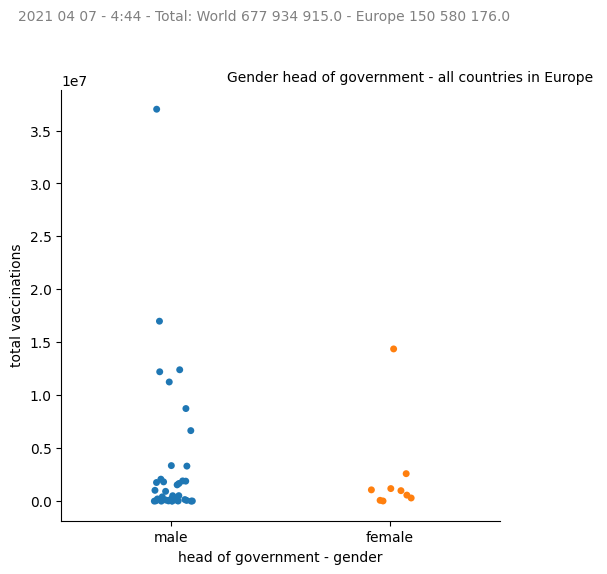

In [63]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [64]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

677 934 915.0 (163, 5) 150 580 176.0 (45, 23)


In [65]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-04-07 04:45:55.890960
Time elapsed (hh:mm:ss.ms) 0:01:24.293543


In [66]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)